In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from scipy import interpolate
import matplotlib.cm as cm
import matplotlib.pyplot as plt

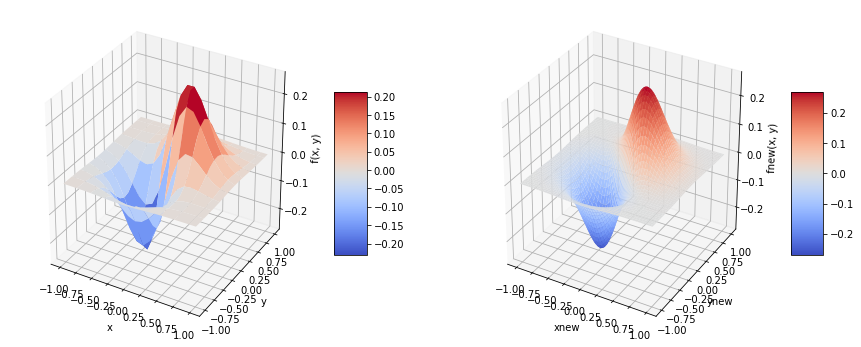

In [2]:
# 二维插值

def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2 + y**2))

# X-Y轴分为20*20的网格
x = np.linspace(-1, 1, 20)
y = np.linspace(-1,1,20)
x, y = np.meshgrid(x, y)  # 20*20的网格数据

fvals = func(x,y) # 计算每个网格点上的函数值  15*15的值

fig = plt.figure(figsize=(15, 6))
# Draw sub-graph1
ax=plt.subplot(1, 2, 1,projection = '3d')
surf = ax.plot_surface(x, y, fvals, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.colorbar(surf, shrink=0.5, aspect=5)#标注

# 二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic') # newfunc为一个函数

# 计算100*100的网格上的插值
xnew = np.linspace(-1,1,100)  #x
ynew = np.linspace(-1,1,100)  # y
fnew = newfunc(xnew, ynew)    # 仅仅是y值   100*100的值  np.shape(fnew) is 100*100
xnew, ynew = np.meshgrid(xnew, ynew)
ax2=plt.subplot(1, 2, 2,projection = '3d')
surf2 = ax2.plot_surface(xnew, ynew, fnew, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
ax2.set_xlabel('xnew')
ax2.set_ylabel('ynew')
ax2.set_zlabel('fnew(x, y)')
plt.colorbar(surf2, shrink=0.5, aspect=5)#标注

plt.show()

In [3]:
# 取二维随机数检查插值得到的 newfunc 的取值情况

x1,y1 = np.random.random((2))
print(x1, y1)
print(newfunc(x1, y1))

0.8174695164388136 0.27252175818471625
[0.02658484]


In [4]:
# 以某一点为中心，在某一半径处做圆周积分

from scipy import integrate

center = [0.5, 0.2]
r = 0.5
def newfunc_theta(theta):
    return r * newfunc(center[0] + r*np.cos(theta), center[1] + r*np.sin(theta))

S = integrate.quad(newfunc_theta, 0, 2*np.pi)[0]
print ('圆周积分结果：%(m).3f' %{'m':S})

圆周积分结果：0.153


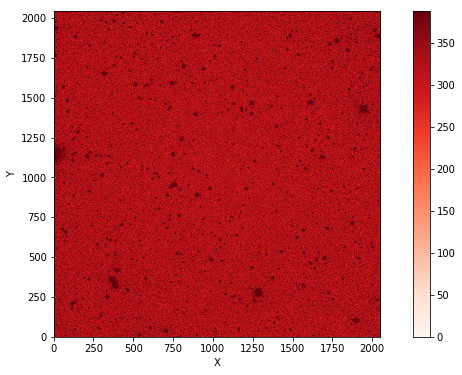

2048
18517.98


In [5]:
# 使用真实 fits 文件进行计算

import astropy.io.fits as fits 

hdu=fits.open('photosample.fit')
data=hdu[0].data
header=hdu[0].header

fig=plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
ax.set_xlabel('X')
ax.set_ylabel('Y')
im=ax.imshow(data,cmap='Reds',origin='low')
fig.colorbar(im, ax=ax)
im.set_clim(0,np.percentile(data.flatten(),98))
plt.show()

print (len(data))
print (data[928, 1205])  # 928,1205 分别是 pixel 行、列值减一（pyhton list index 从零开始）

18517.98


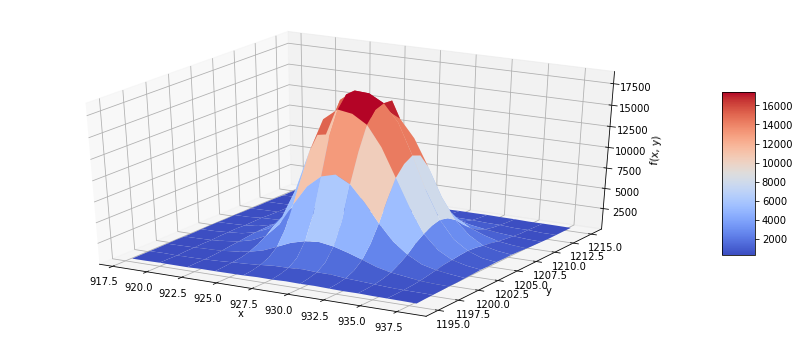

In [6]:
# 将fits文件中的 data 转为函数，以便插值

def data_func(x,y):
    return data[x,y]
print (data_func(928, 1205))

# 选较小区域（20*20）
x = np.arange(918, 939, 1)
y = np.arange(1195, 1216, 1)
x, y = np.meshgrid(x, y)

fvals = data_func(x,y)

fig = plt.figure(figsize=(15, 6))
ax=plt.subplot(111,projection = '3d')
surf = ax.plot_surface(x, y, fvals, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

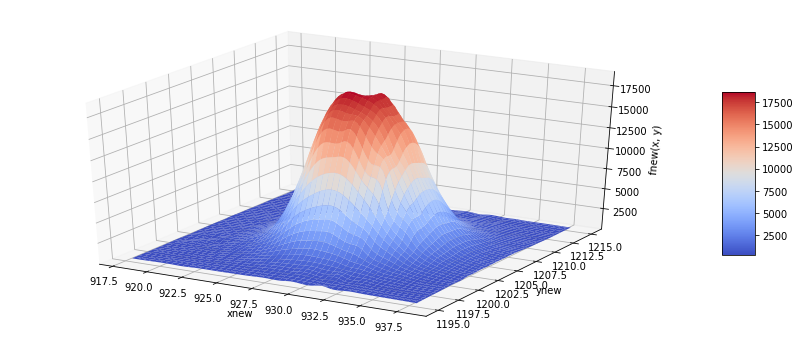

In [7]:
new_data_func = interpolate.interp2d(x, y, fvals, kind='cubic')
'''
此处如果直接选择整个图像区域（2048*2048）插值会报错（格点太多）
'''

xnew = np.linspace(918, 938,100)
ynew = np.linspace(1195, 1215,100)
fnew = new_data_func(xnew, ynew)
xnew, ynew = np.meshgrid(xnew, ynew)

fig = plt.figure(figsize=(15, 6))
ax2=plt.subplot(111,projection = '3d')
surf2 = ax2.plot_surface(xnew, ynew, fnew, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
ax2.set_xlabel('xnew')
ax2.set_ylabel('ynew')
ax2.set_zlabel('fnew(x, y)')
plt.colorbar(surf2, shrink=0.5, aspect=5)#标注
plt.show()

F:\Anaconda\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


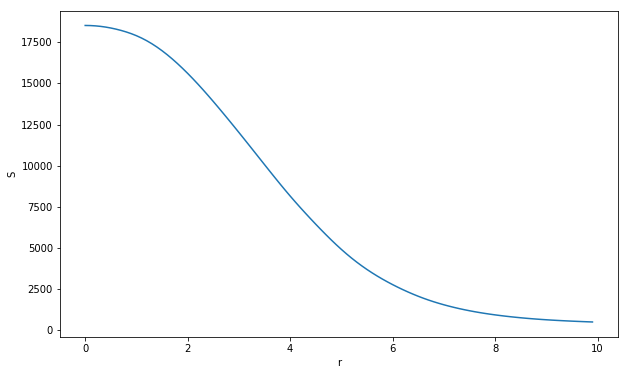

[18517.98, 18511.82900394941, 18493.364541703333, 18462.55687847896, 18419.355675054885, 18363.72401102454, 18296.100782000743, 18216.826838448684, 18125.137481887563, 18019.009801904995, 17896.080398568167, 17754.28262415758, 17592.46219507078, 17410.150846017, 17207.236262527713, 16984.324213547334, 16742.299489655863, 16482.250575999453, 16205.43431006782, 15913.187582659828, 15606.758487168698, 15287.229662158425, 14955.570978937329, 14612.924807205874, 14260.635539948637, 13900.135422695434, 13532.854714776735, 13160.109957209612, 12783.069551942974, 12402.412276952778, 12018.374026576443, 11631.216344549897, 11241.40129099403, 10849.677276593322, 10457.08715235702, 10064.87195581919, 9674.307070156772, 9286.573316994944, 8903.289721141613, 8526.820303355084, 8159.012159243651, 7800.7460970574775, 7451.349194690176, 7109.359635949125, 6773.679049943118, 6443.958855589092, 6120.613798702695, 5804.622402693641, 5497.404877391494, 5200.572719499858, 4915.636964099521, 4643.8146504219

In [8]:
center = [928, 1205]
S = [data[928, 1205]]
r = [0]

R = 10  # 最大半径
N = 100  # 取值个数
for i in range(1, N):
    r_new = i*R/N
    r.append(r_new)
    def data_func_theta(theta):
        return r_new * new_data_func(center[0] + r_new*np.cos(theta), center[1] + r_new*np.sin(theta))
    S_new = integrate.quad(data_func_theta, 0, 2*np.pi)[0]
    S.append(S_new/(2*np.pi*r_new))

fig = plt.figure(figsize=(10, 6))
ax=plt.subplot(111)
ax.plot(r, S)
ax.set_xlabel('r')
ax.set_ylabel('S')
plt.show()

print (S)